[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/feature-use/plotly.ipynb)

# Plotly Tutorial

In this notebook, we briefly guide through the usage of plotly in NeuralProphet.

Plotly is currently implemented as an alternative option to the Matplotlib plotting backend.

We will use the peyton manning example to demonstrate the capabilities of plotly.

In [1]:
if "google.colab" in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

    from google.colab import output

    output.enable_custom_widget_manager()

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

# only used for this example notebook, usually use the default plotting engine
import plotly.io as pio

pio.renderers.default = "svg"

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")

m = NeuralProphet(quantiles=[0.02, 0.98], epochs=10)
metrics = m.fit(df, freq="D")

future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)
forecast = m.predict(future)

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 93it [00:00, ?it/s]

In [3]:
m.plot(forecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~3D</i>',
              'type': 'scatter',
              'uid': '526b50f9-10c8-4c35-a2e9-042003890437',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0),
                          datetime.datetime(2007, 12, 15, 0, 0), ...,
                          datetime.datetime(2017, 1, 14, 0, 0),
                          datetime.datetime(2017, 1, 16, 0, 0),
                          datetime.datetime(2017, 1, 19, 0, 0)], dtype=object),
              'y': array([8.46675682, 8.03885078, 7.77397919, ..., 7.97593641, 8.67865372,
                          8.27845001])},
             {'fillcolor': 'rgba(45, 146, 255, 0.2)',
              'line': {'color': 'rgba(45, 146, 255, 0.2

In the following, we plot the prediction individually specifying the matplotlib, the plotly and the plotly-resampler plotting backend

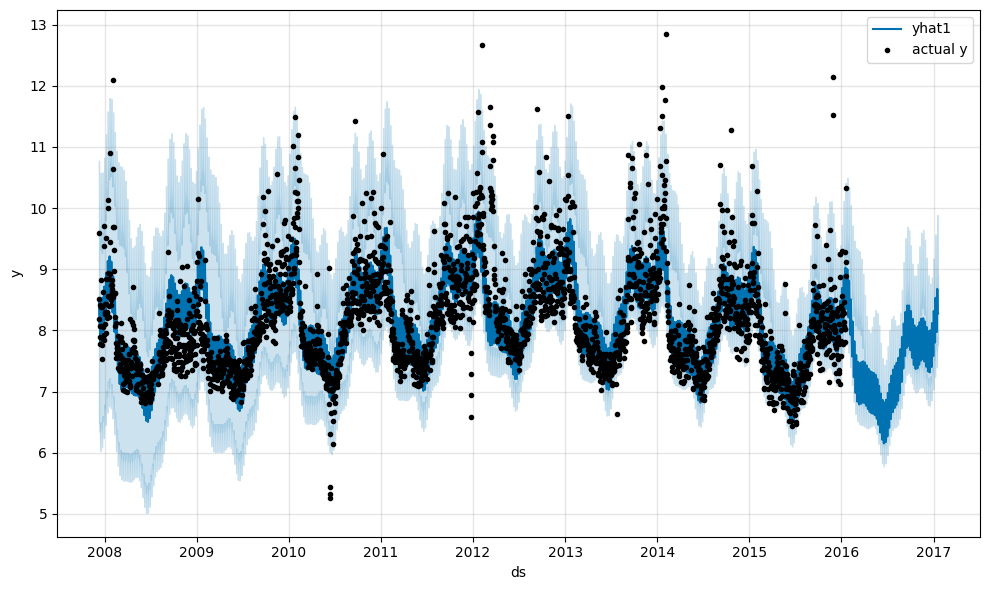

In [4]:
fig = m.plot(forecast, plotting_backend="matplotlib")

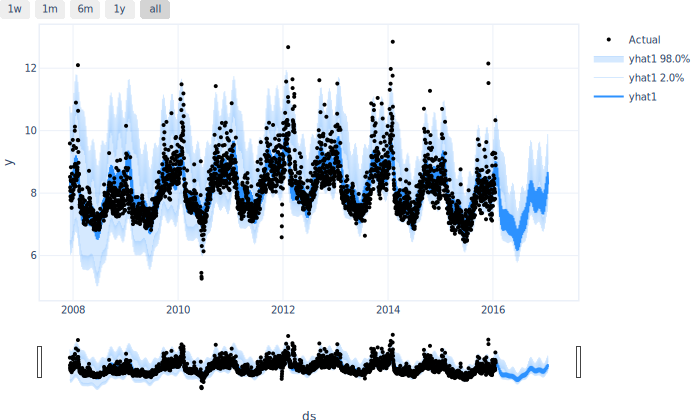

In [5]:
m.plot(forecast, plotting_backend="plotly")

In [6]:
m.plot(forecast, plotting_backend="plotly-resampler")

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> yhat1 <i style="color:#fc9944">~3D</i>',
              'type': 'scatter',
              'uid': '4bd8987f-fd43-43fa-b53a-bc744c37b50a',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0),
                          datetime.datetime(2007, 12, 15, 0, 0), ...,
                          datetime.datetime(2017, 1, 14, 0, 0),
                          datetime.datetime(2017, 1, 16, 0, 0),
                          datetime.datetime(2017, 1, 19, 0, 0)], dtype=object),
              'y': array([8.46675682, 8.03885078, 7.77397919, ..., 7.97593641, 8.67865372,
                          8.27845001])},
             {'fillcolor': 'rgba(45, 146, 255, 0.2)',
              'line': {'color': 'rgba(45, 146, 255, 0.2

## Default plotting backend

Alternatively, the default plotting backend can be specified once using the following line. This will cause all the following plots to be displayed using

In [7]:
m.set_plotting_backend("matplotlib")

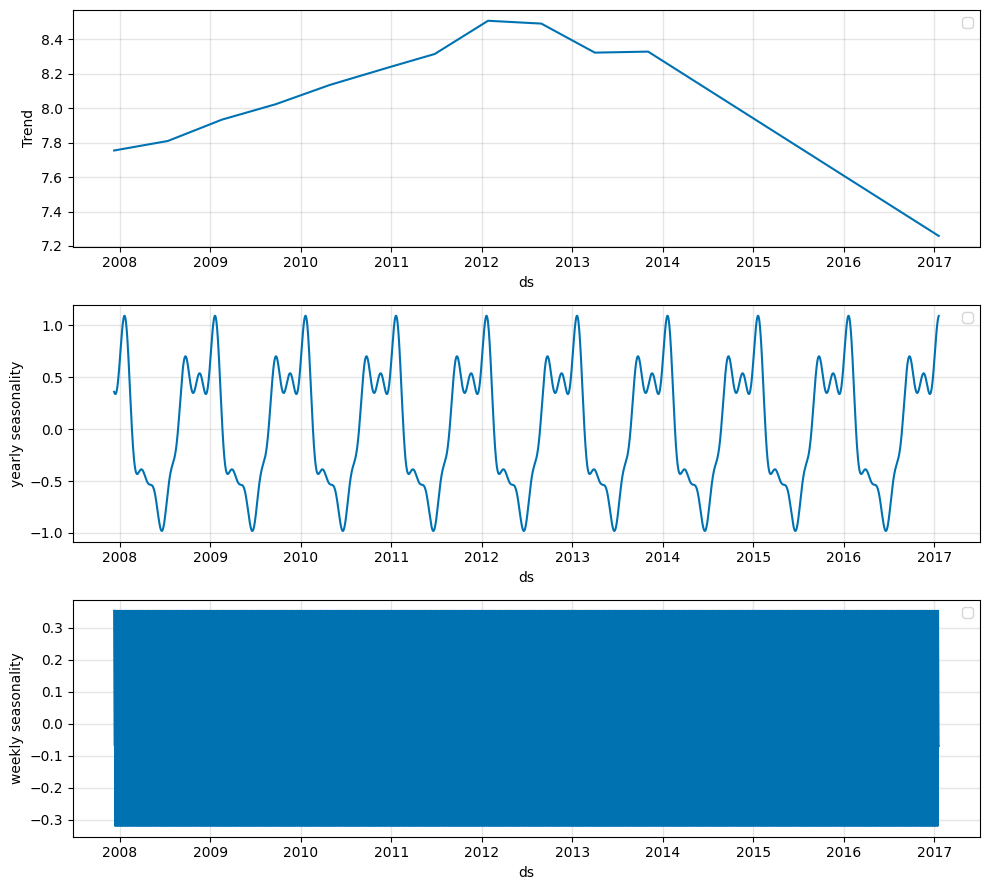

In [8]:
m.plot_components(forecast)